In [1]:
from scipy import fft

In [2]:
from numerov import *

In [3]:
%matplotlib widget

In [4]:
length : float = defaultLength

In [5]:
potentialHeight : float = 1.0

In [6]:
scalar : float = 1000

In [7]:
lengthRatios : list[float] = [1.0 / 3.0, 2.0 / 3.0, 1.0]

In [8]:
potentialStepHeightRatios : list[float] = [1.0 / 3.0, 2.0 / 3.0, 1.0]

In [9]:
potentialFunction = partial(
        lambda unitLength, unitPotentialHeight, lengthRatios_, potentialStepHeightRatios_, normalizedPositions_ : \
                stairwell(
                        normalizedPositions_ + (1.0 / 2.0), \
                        unitLength, \
                        unitPotentialHeight, \
                        lengthRatios, \
                        potentialStepHeightRatios
                    ), 
        length, 
        potentialHeight, 
        lengthRatios, 
        potentialStepHeightRatios
    )

In [10]:
results = computeWaveFunction(
        potentialFunction, 
        scalingFactor = scalar, 
        length = length
    )

In [11]:
potential : np.array = results["potential"]

In [12]:
waveFunctions : np.ndarray = results["waveFunctions"]

In [13]:
energies : np.array = results["energies"]

In [14]:
normalizedPositions : np.array = results["normalizedPositions"]

In [15]:
probabilityDistributions : np.ndarray = waveFunctions ** 2

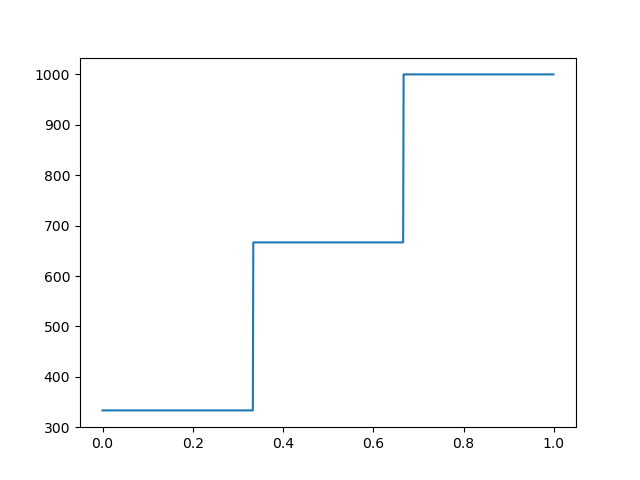

In [54]:
%matplotlib widget
plt.plot(normalizedPositions, potential)

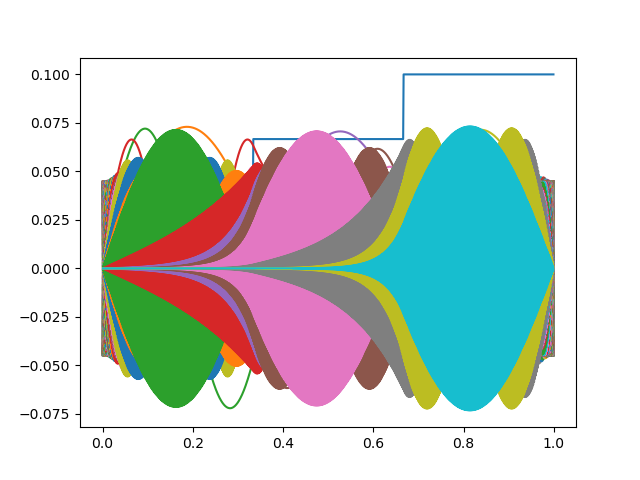

In [58]:
%matplotlib widget
plt.plot(normalizedPositions, potential / scalar / 10)
for waveFunction in waveFunctions:
     plt.plot(normalizedPositions[1:], waveFunction)

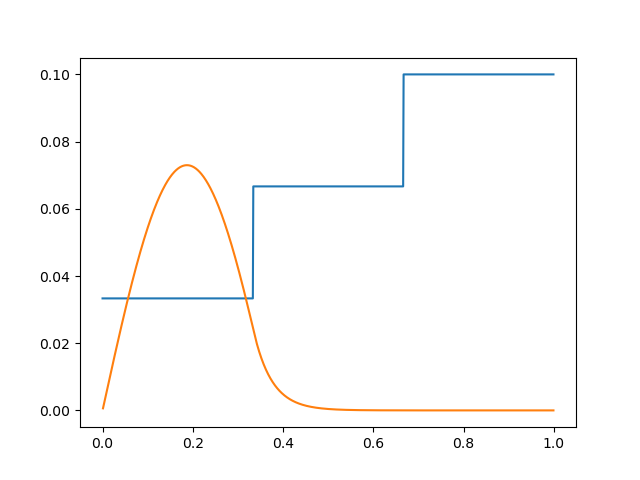

In [61]:
%matplotlib widget
plt.plot(normalizedPositions, potential / scalar / 10)
plt.plot(normalizedPositions[1:], waveFunctions[0])

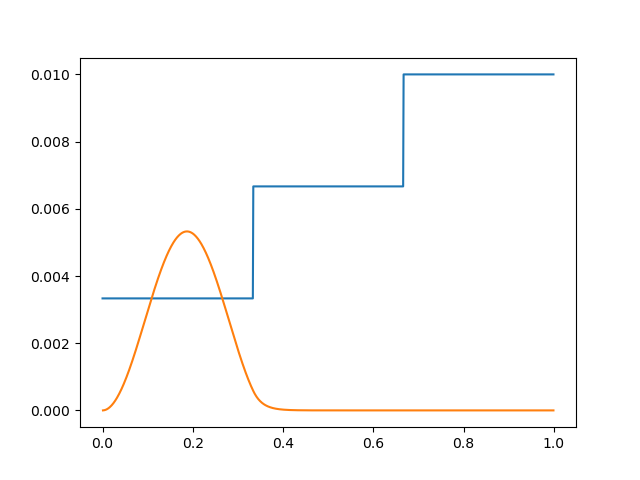

In [62]:
%matplotlib widget
plt.plot(normalizedPositions, potential / scalar / 100)
plt.plot(normalizedPositions[1:], probabilityDistributions[0])

In [20]:
maxValues : np.array = np.array(list(map(np.max, probabilityDistributions)))
expectationValues : np.array = np.array(list(map(lambda distribution : np.sum(distribution * normalizedPositions[1:]), probabilityDistributions)))

In [21]:
mostProbablePositions : np.array = np.array(list(map(
        lambda probabilityDistribution, maxValue : np.sum(np.where(~(probabilityDistribution == maxValue), 0, normalizedPositions[1:])), 
        probabilityDistributions, 
        maxValues
    )))

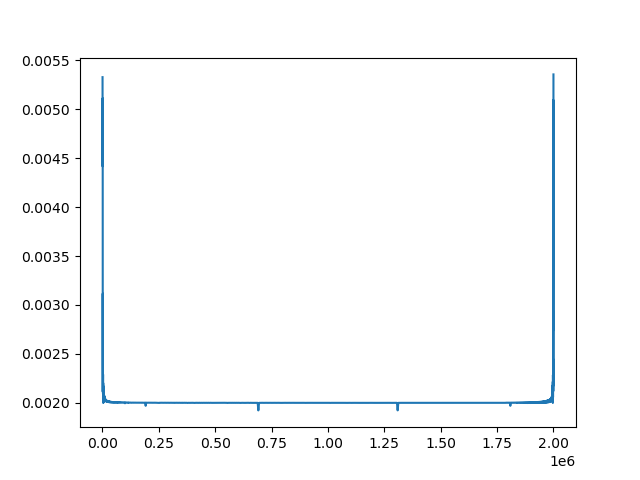

In [22]:
%matplotlib widget
plt.plot(energies, maxValues)

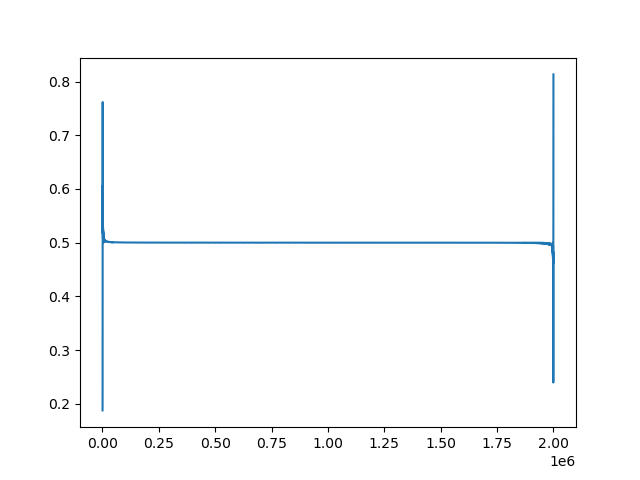

In [23]:
%matplotlib widget
plt.plot(energies, expectationValues)

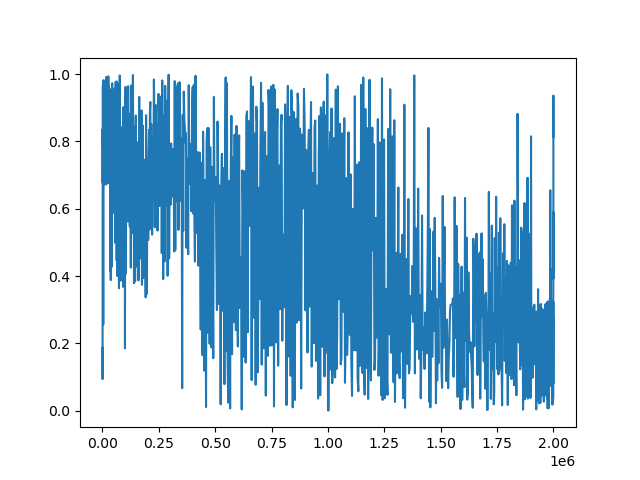

In [24]:
%matplotlib widget
plt.plot(energies, mostProbablePositions)

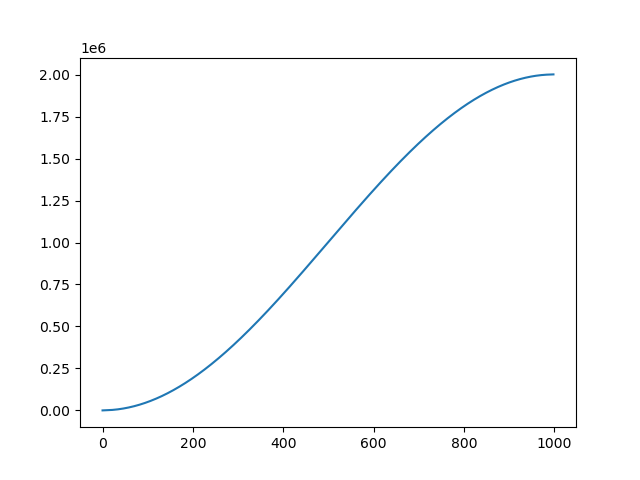

In [25]:
%matplotlib widget
plt.plot(energies)

In [26]:
def binExpectationValuesToRegion(
            expectationValues : np.array, 
            lengthRatios : list, 
            unitLength : float
        ) -> np.array: 
    regionLengths : np.array = np.array([0] + lengthRatios) * unitLength
    expectationRegionBins : np.array = np.zeros(len(energies))
    for ii in range(1, len(regionLengths)): 
            expectationRegionBins = np.where(
                ~((expectationValues < regionLengths[ii]) \
                      & (expectationValues > regionLengths[ii - 1])), 
                expectationRegionBins, 
                ii
            )
    return expectationRegionBins

In [27]:
expectationRegionBins = binExpectationValuesToRegion(expectationValues, lengthRatios, length)

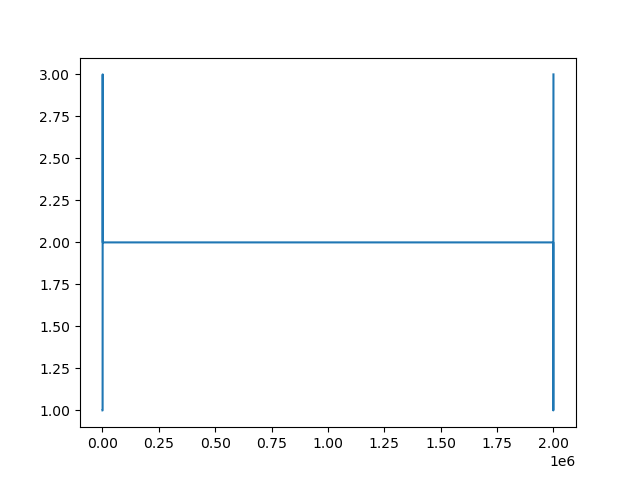

In [28]:
%matplotlib widget
plt.plot(energies, expectationRegionBins)

In [29]:
maxRegionBins = binExpectationValuesToRegion(mostProbablePositions, lengthRatios, length)

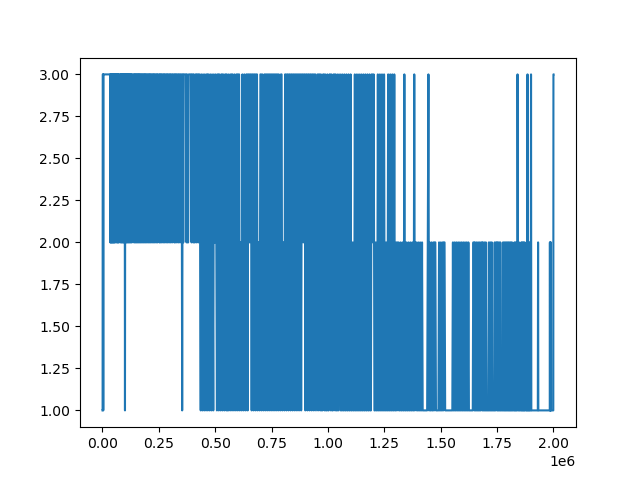

In [30]:
%matplotlib widget
plt.plot(energies, maxRegionBins)

In [31]:
regionPlots : np.ndarray = np.zeros((len(lengthRatios), len(energies)))
for ii, maxRegion in enumerate(maxRegionBins): 
    regionPlots[int(maxRegion) - 1][ii] = mostProbablePositions[ii]

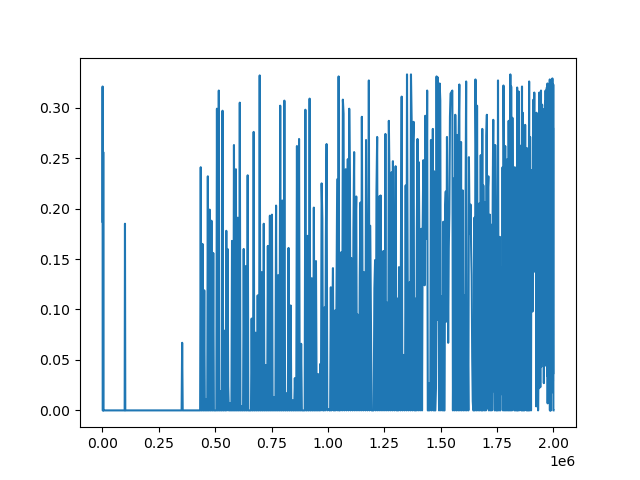

In [63]:
%matplotlib widget
plt.plot(energies, regionPlots[0])

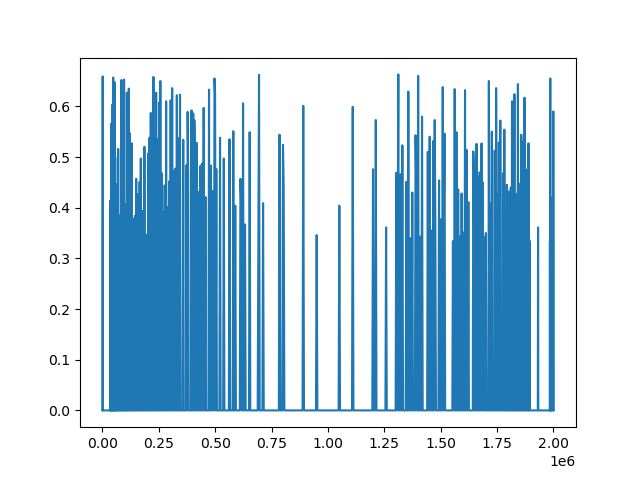

In [64]:
%matplotlib widget
plt.plot(energies, regionPlots[1])

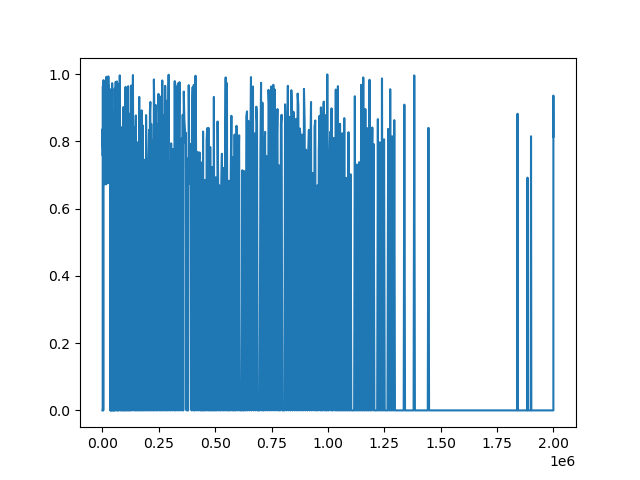

In [65]:
%matplotlib widget
plt.plot(energies, regionPlots[2])

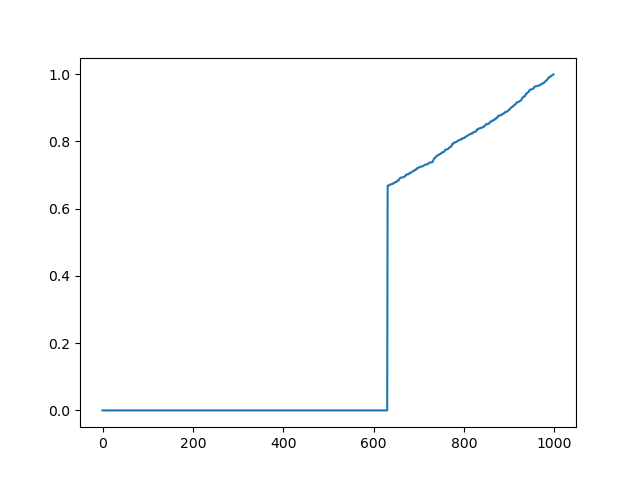

In [66]:
%matplotlib widget
plt.plot(np.sort(regionPlots[2]))

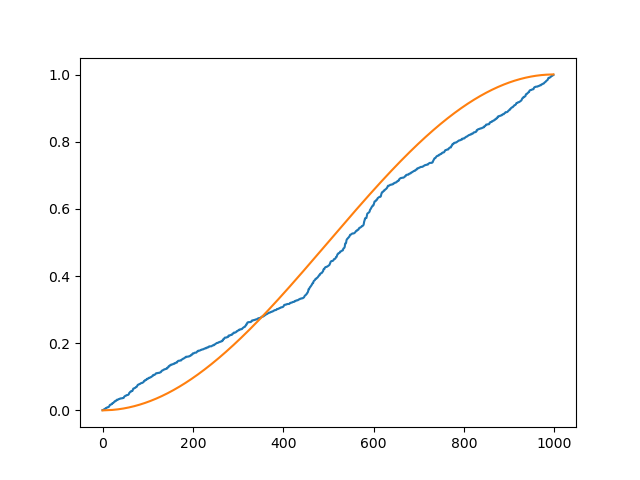

In [67]:
%matplotlib widget
plt.plot(np.sort(mostProbablePositions))
plt.plot(energies / 2e6)

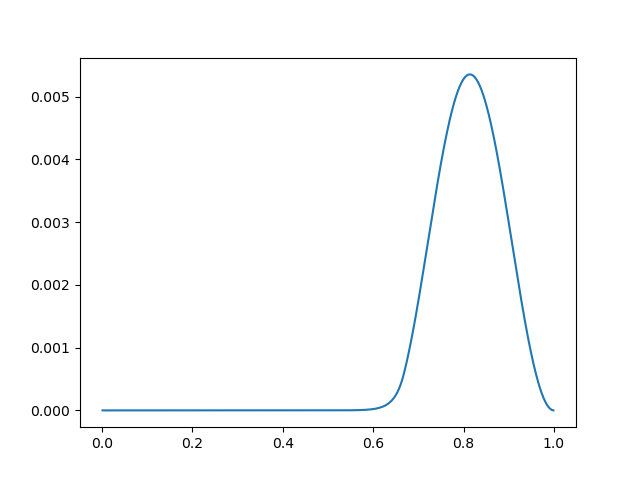

In [68]:
%matplotlib widget
plt.plot(normalizedPositions[1:], probabilityDistributions[998])

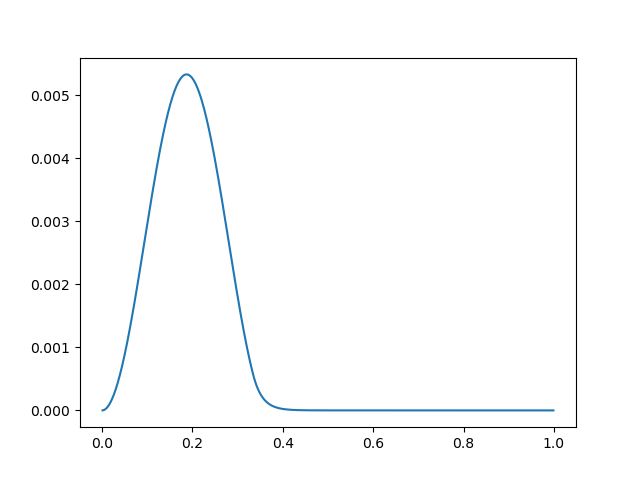

In [69]:
%matplotlib widget
plt.plot(normalizedPositions[1:], probabilityDistributions[0])

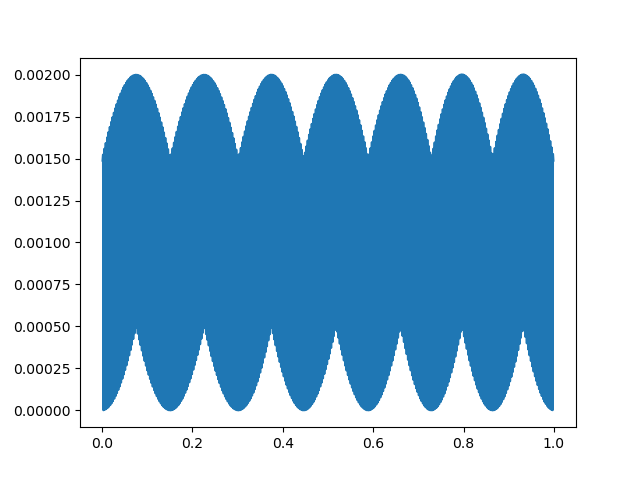

In [70]:
%matplotlib widget
plt.plot(normalizedPositions[1:], probabilityDistributions[330])

Using matplotlib backend: module://ipympl.backend_nbagg


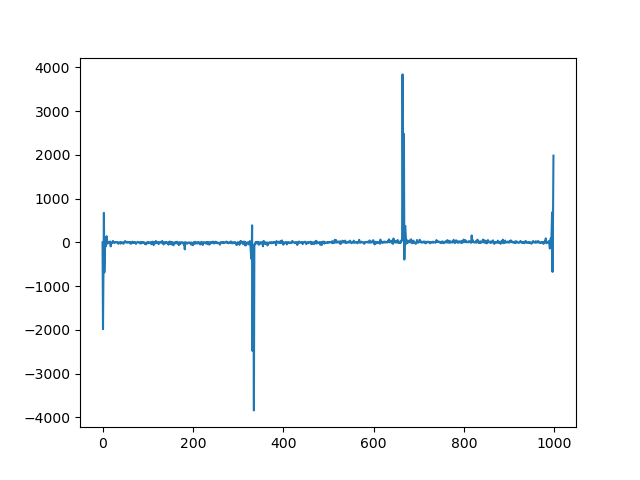

In [71]:
%matplotlib
plt.plot(fft.fft(mostProbablePositions) * fft.fft(-1j * mostProbablePositions))

In [72]:
probabilityDistributionLength : int = len(probabilityDistributions[0])

In [73]:
medianIndex : int = round((probabilityDistributionLength - 1) / 2)

In [74]:
medians : np.array = np.array(list(map(lambda probabilityDistribution : probabilityDistribution[medianIndex], probabilityDistributions)))

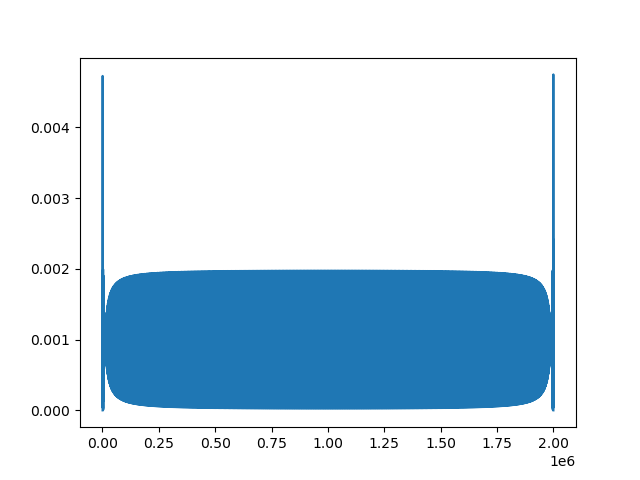

In [75]:
%matplotlib widget
plt.plot(energies, medians)

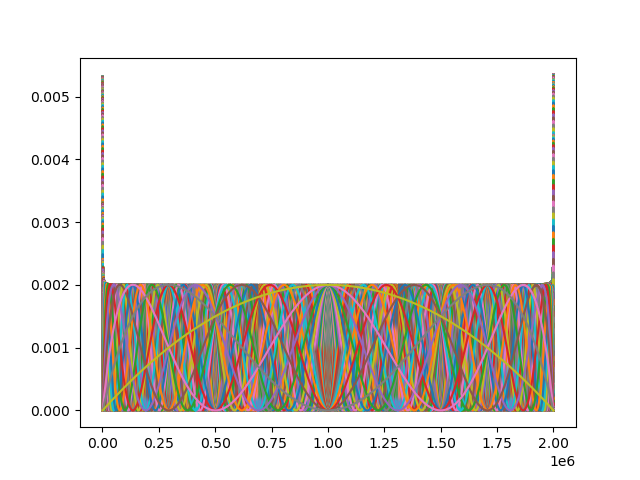

In [76]:
%matplotlib widget
for randomIndex in range(probabilityDistributionLength):
    randomIndexPoints : np.array = np.array(list(map(lambda probabilityDistribution : probabilityDistribution[randomIndex], probabilityDistributions)))
    plt.plot(energies, randomIndexPoints)

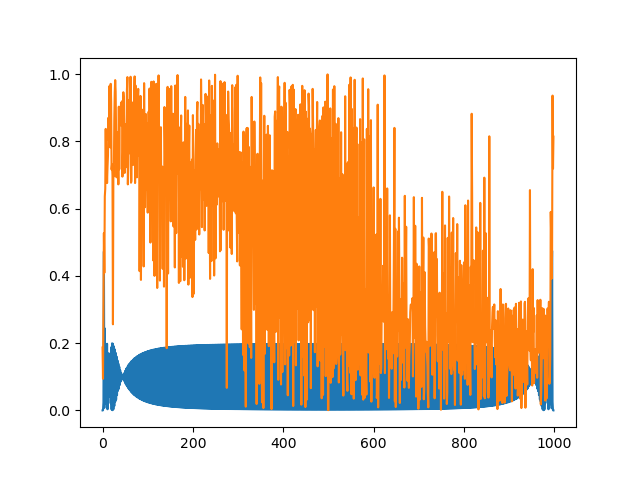

In [77]:
%matplotlib widget
plt.plot(medians * 1e2)
plt.plot(mostProbablePositions)

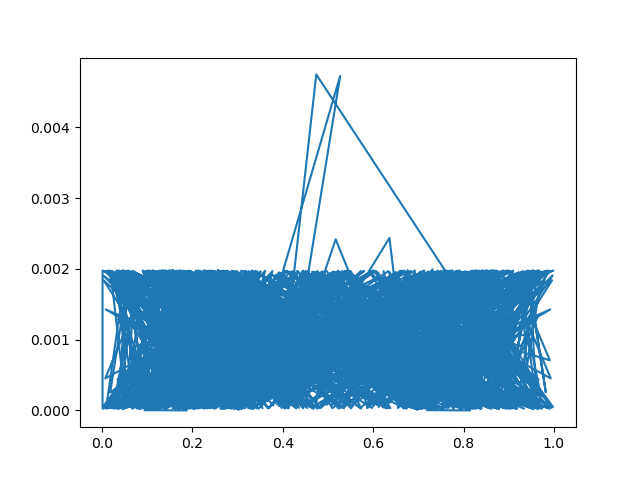

In [78]:
%matplotlib widget
plt.plot(mostProbablePositions, medians)

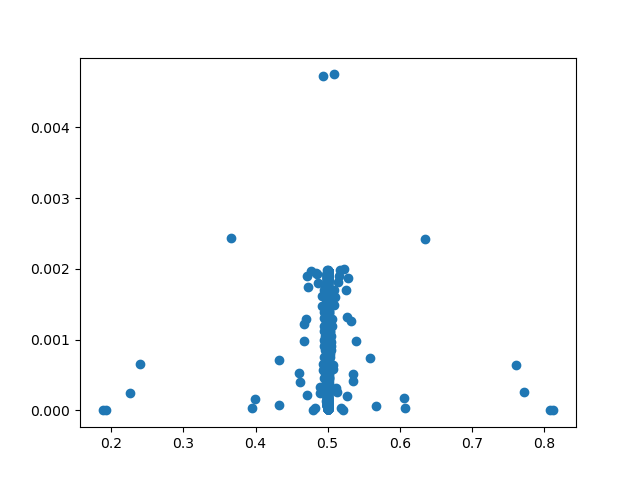

In [79]:
%matplotlib widget
plt.scatter(expectationValues, medians)

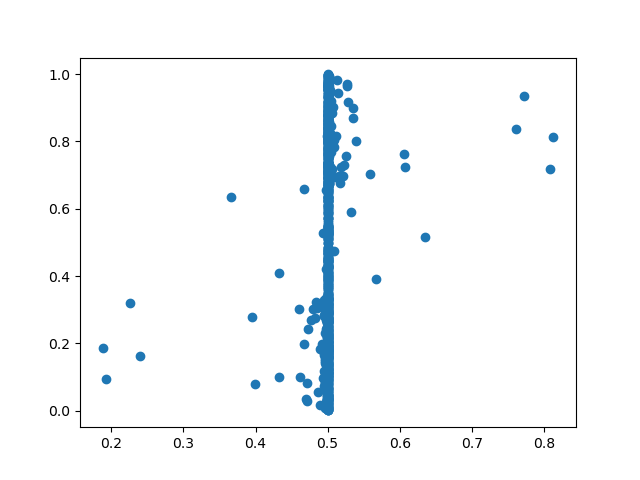

In [80]:
%matplotlib widget
plt.scatter(expectationValues, mostProbablePositions)

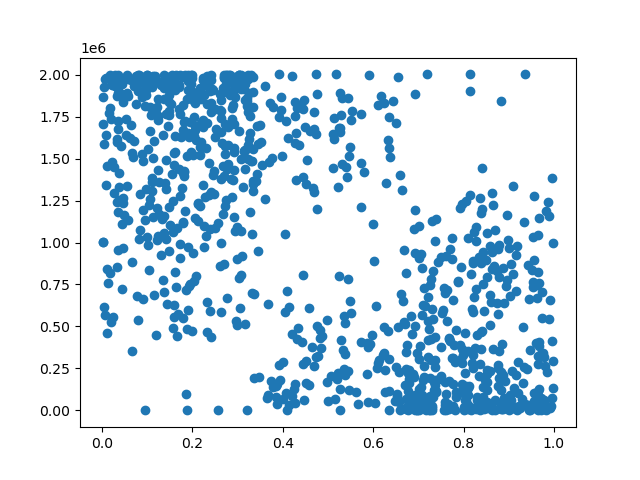

In [81]:
%matplotlib widget
plt.scatter(mostProbablePositions, energies)